In [1]:
import pandas as pd
from matplotlib import pyplot as pt

In [2]:
df=pd.read_csv("covid_19_data.csv",index_col='SNo')

In [3]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [4]:
df.drop(["Province/State","Last Update"],axis=1,inplace=True)

In [5]:
df.columns

Index(['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306429 entries, 1 to 306429
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  306429 non-null  object 
 1   Country/Region   306429 non-null  object 
 2   Confirmed        306429 non-null  float64
 3   Deaths           306429 non-null  float64
 4   Recovered        306429 non-null  float64
dtypes: float64(3), object(2)
memory usage: 14.0+ MB


In [7]:
df.isnull().sum()

ObservationDate    0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [8]:
df.describe()

,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [9]:
print("First five")
print(df.head(5))
print("=====================================================================")
print("Last five")
print(df.tail(5))

First five
    ObservationDate  Country/Region  Confirmed  Deaths  Recovered
SNo                                                              
1        01/22/2020  Mainland China        1.0     0.0        0.0
2        01/22/2020  Mainland China       14.0     0.0        0.0
3        01/22/2020  Mainland China        6.0     0.0        0.0
4        01/22/2020  Mainland China        1.0     0.0        0.0
5        01/22/2020  Mainland China        0.0     0.0        0.0
Last five
       ObservationDate  Country/Region  Confirmed  Deaths  Recovered
SNo                                                                 
306425      05/29/2021         Ukraine   102641.0  2335.0    95289.0
306426      05/29/2021     Netherlands    29147.0   245.0        0.0
306427      05/29/2021  Mainland China     1364.0     1.0     1324.0
306428      05/29/2021         Ukraine    87550.0  1738.0    83790.0
306429      05/29/2021     Netherlands   391559.0  4252.0        0.0


In [10]:
#including one more column named year
def year(x):
    year=x[6:]
    return year
df['year']=df["ObservationDate"].apply(year)

In [11]:
df.columns

Index(['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered',
       'year'],
      dtype='object')

<BarContainer object of 25 artists>

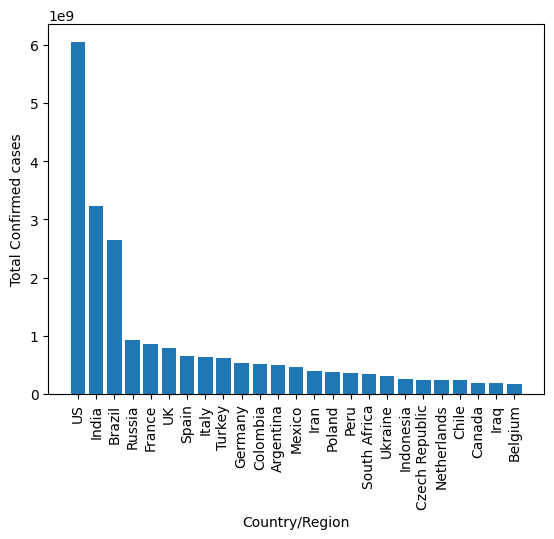

In [12]:
#Top 25 country/region with highest confirmed cases
cases=df.groupby("Country/Region")[['Confirmed','Deaths','Recovered']].sum().reset_index()

top_cases=cases.nlargest(25,'Confirmed')
pt.xticks(rotation=90)
pt.xlabel("Country/Region")
pt.ylabel("Total Confirmed cases")
pt.bar(top_cases["Country/Region"],top_cases["Confirmed"])

<BarContainer object of 25 artists>

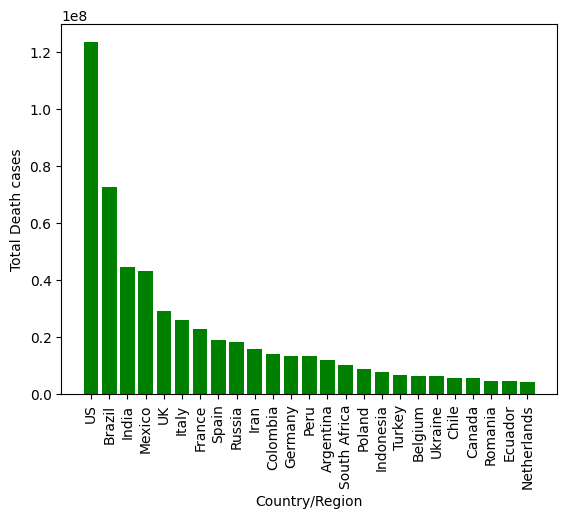

In [13]:
#Top 25 country/region with highest Death cases
top_cases=cases.nlargest(25,'Deaths')
pt.xticks(rotation=90)
pt.xlabel("Country/Region")
pt.ylabel("Total Death cases")
pt.bar(top_cases["Country/Region"],top_cases["Deaths"],color='green')


<BarContainer object of 25 artists>

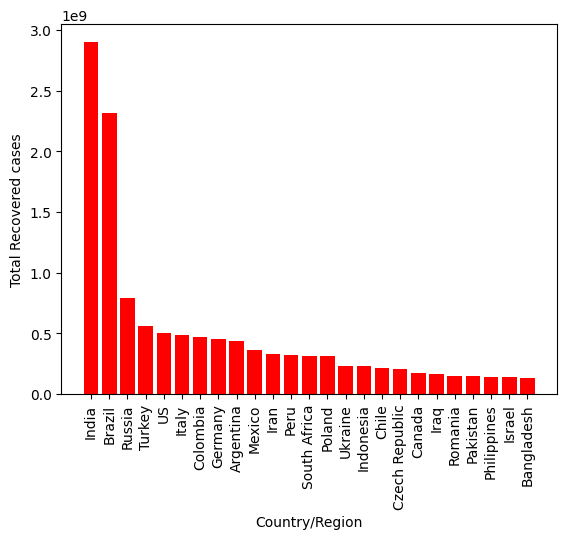

In [14]:
#Top 25 country/region with highest recovered cases
top_cases=cases.nlargest(25,'Recovered')
pt.xticks(rotation=90)
pt.xlabel("Country/Region")
pt.ylabel("Total Recovered cases")
pt.bar(top_cases["Country/Region"],top_cases["Recovered"],color='red')

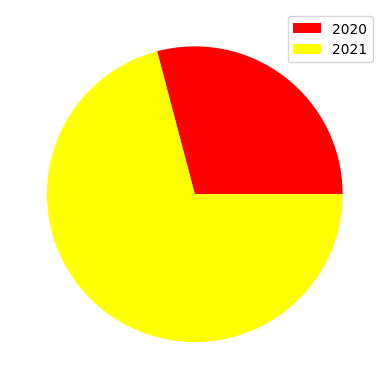

In [15]:
#Total Confirmed cases by year
count=df["Confirmed"].value_counts()
cases=df.groupby("year")[['Confirmed','Deaths','Recovered']].sum().reset_index()
pt.pie(cases["Confirmed"],colors=['red','yellow'])
pt.legend(cases['year'])

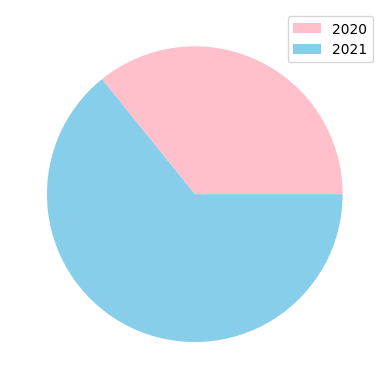

In [16]:
#Total Death cases by year
pt.pie(cases["Deaths"],colors=['pink','skyblue'])
pt.legend(cases['year'])

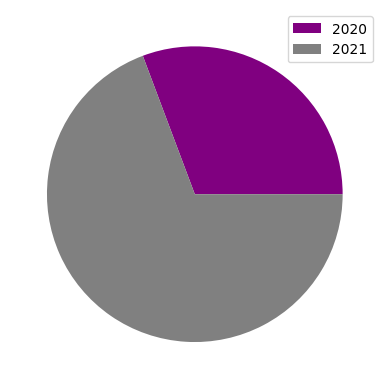

In [17]:
#Total Recovered cases by year
pt.pie(cases["Recovered"],colors=['purple','grey'])
pt.legend(cases['year'])

<BarContainer object of 10 artists>

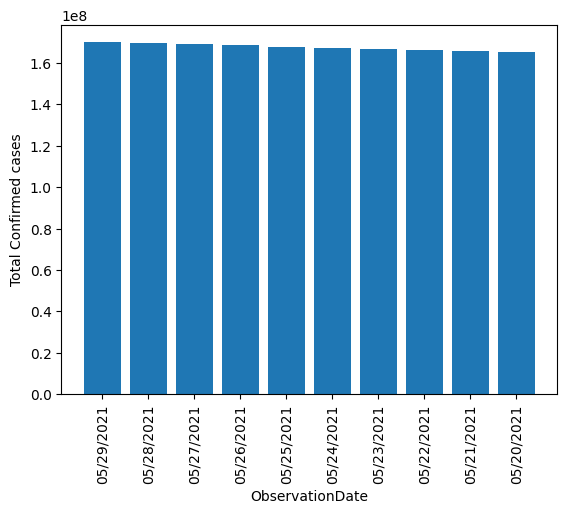

In [18]:
# Top days with high Confirmed cases
cases=df.groupby("ObservationDate")[['Confirmed','Deaths','Recovered']].sum().reset_index()

top_cases=cases.nlargest(10,'Confirmed')
pt.xticks(rotation=90)
pt.xlabel("ObservationDate")
pt.ylabel("Total Confirmed cases")
pt.bar(top_cases["ObservationDate"],top_cases["Confirmed"])


<BarContainer object of 10 artists>

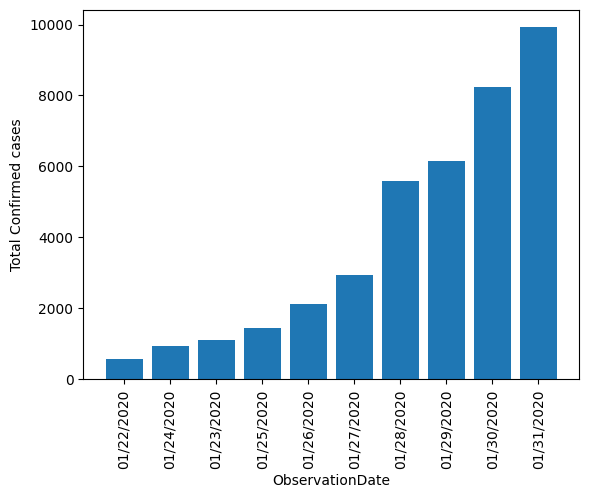

In [19]:
# Top days with lowest Confirmed cases
top_cases=cases.nsmallest(10,'Confirmed')
pt.xticks(rotation=90)
pt.xlabel("ObservationDate")
pt.ylabel("Total Confirmed cases")
pt.bar(top_cases["ObservationDate"],top_cases["Confirmed"])


<BarContainer object of 10 artists>

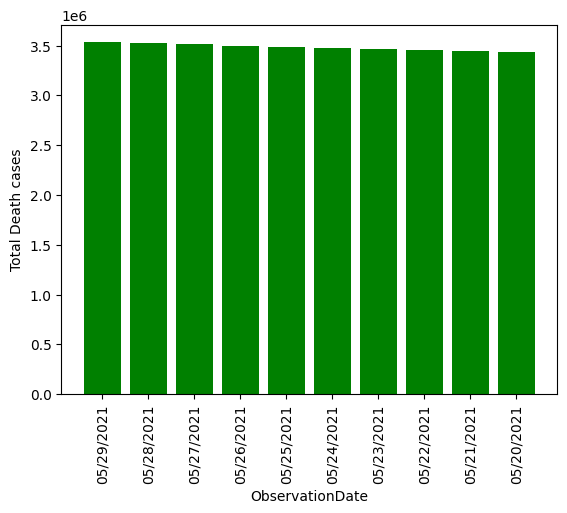

In [20]:
# Top days with high Deaths cases
top_cases=cases.nlargest(10,'Deaths')
pt.xticks(rotation=90)
pt.xlabel("ObservationDate")
pt.ylabel("Total Death cases")
pt.bar(top_cases["ObservationDate"],top_cases["Deaths"],color="green")

<BarContainer object of 10 artists>

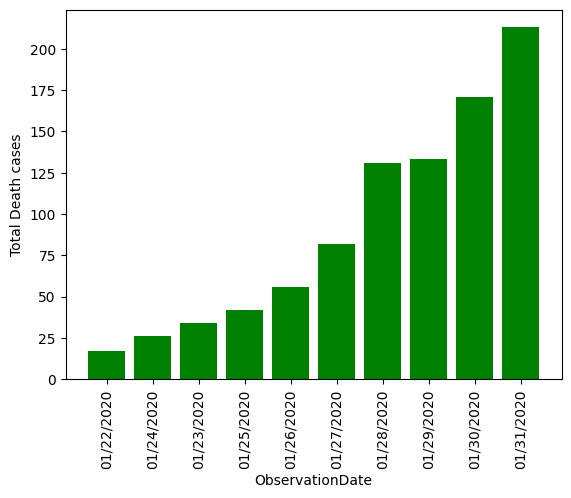

In [21]:
# Top days with high Deaths cases
top_cases=cases.nsmallest(10,'Deaths')
pt.xticks(rotation=90)
pt.xlabel("ObservationDate")
pt.ylabel("Total Death cases")
pt.bar(top_cases["ObservationDate"],top_cases["Deaths"],color="green")

<BarContainer object of 10 artists>

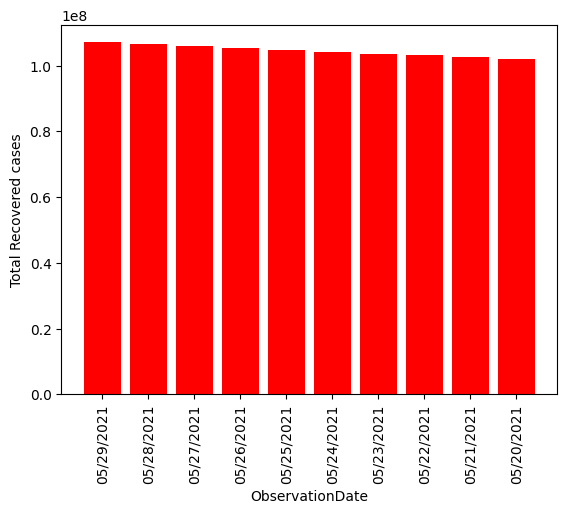

In [22]:
# Top days with high Recovered cases
top_cases=cases.nlargest(10,'Recovered')
pt.xticks(rotation=90)
pt.xlabel("ObservationDate")
pt.ylabel("Total Recovered cases")
pt.bar(top_cases["ObservationDate"],top_cases["Recovered"],color="red")


<BarContainer object of 10 artists>

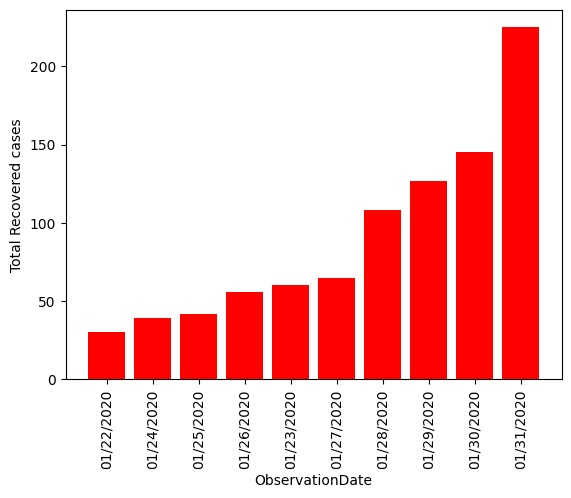

In [23]:
# Top days with high Recovered cases
top_cases=cases.nsmallest(10,'Recovered')
pt.xticks(rotation=90)
pt.xlabel("ObservationDate")
pt.ylabel("Total Recovered cases")
pt.bar(top_cases["ObservationDate"],top_cases["Recovered"],color="red")


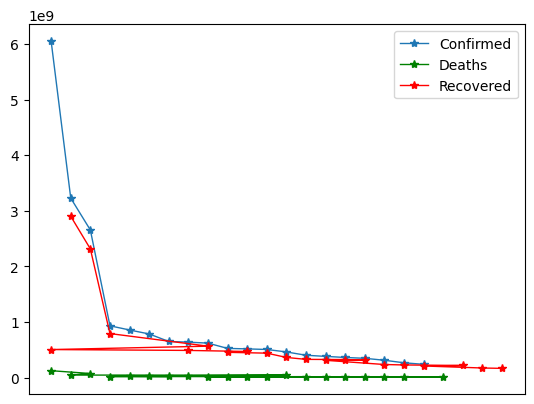

In [24]:
cases1=df.groupby("Country/Region")[['Confirmed']].sum().reset_index()
cases2=df.groupby("Country/Region")[['Deaths']].sum().reset_index()
cases3=df.groupby("Country/Region")[['Recovered']].sum().reset_index()

top_cases1=cases1.nlargest(20,"Confirmed")
top_cases2=cases2.nlargest(20,"Deaths")
top_cases3=cases3.nlargest(20,"Recovered")

pt.plot(top_cases1['Country/Region'],top_cases1['Confirmed'],linewidth=1,label='Confirmed',marker='*')
pt.plot(top_cases2['Country/Region'],top_cases2['Deaths'],linewidth=1,label='Deaths',marker='*',color='green')
pt.plot(top_cases3['Country/Region'],top_cases3['Recovered'],linewidth=1,label='Recovered',marker='*',color='red')
pt.xticks([])
pt.legend()

In [25]:
#top countries confirmed
top_cases1

,Country/Region,Confirmed
214,US,6.049146e+09
96,India,3.226768e+09
27,Brazil,2.653588e+09
172,Russia,9.305488e+08
71,France,8.551890e+08
213,UK,7.837944e+08
194,Spain,6.491118e+08
102,Italy,6.366943e+08
212,Turkey,6.189410e+08
77,Germany,5.241668e+08


In [26]:
#top countries Deaths
top_cases2

,Country/Region,Deaths
214,US,123303762.0
27,Brazil,72624610.0
96,India,44424723.0
137,Mexico,43005509.0
213,UK,29171984.0
102,Italy,26000702.0
71,France,22720818.0
194,Spain,19065104.0
172,Russia,18363719.0
98,Iran,15744407.0


In [27]:
#top countries recovered
top_cases3

,Country/Region,Recovered
96,India,2.900590e+09
27,Brazil,2.313677e+09
172,Russia,7.907057e+08
212,Turkey,5.641706e+08
214,US,5.033710e+08
102,Italy,4.877998e+08
44,Colombia,4.687470e+08
77,Germany,4.533833e+08
8,Argentina,4.387503e+08
137,Mexico,3.617802e+08
